In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
train_data = pd.read_csv('/data/notebook_files/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
test_data = pd.read_csv('/data/notebook_files/test.csv')
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():
            
            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')
            
            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 16, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Uti

In [15]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

In [16]:
missing_value_checker(test_edited)
missing_value_checker(train_edited)
train_edited.shape, test_edited.shape

[]
0
[]
0


((1460, 76), (1459, 75))

In [17]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [18]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [20]:
X_train.shape, test_edited.shape

((1168, 75), (1459, 75))

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
model = keras.Sequential([
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='relu')
])
tf.random.set_seed(40)

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train, batch_size=10, epochs=150)

Epoch 1/150
117/117 [==============================] - 1s 2ms/step - loss: 25075615744.0000 - mae: 132853.9219
Epoch 2/150
117/117 [==============================] - 0s 2ms/step - loss: 7049159680.0000 - mae: 48716.4219
Epoch 3/150
117/117 [==============================] - 0s 2ms/step - loss: 5456974336.0000 - mae: 45288.3633
Epoch 4/150
117/117 [==============================] - 0s 2ms/step - loss: 4553758208.0000 - mae: 43879.6523
Epoch 5/150
117/117 [==============================] - 0s 2ms/step - loss: 4011320832.0000 - mae: 42166.6523
Epoch 6/150
117/117 [==============================] - 0s 2ms/step - loss: 3571876352.0000 - mae: 40709.9922
Epoch 7/150
117/117 [==============================] - 0s 2ms/step - loss: 3239712256.0000 - mae: 38870.9531
Epoch 8/150
117/117 [==============================] - 0s 2ms/step - loss: 2929740544.0000 - mae: 36909.7188
Epoch 9/150
117/117 [==============================] - 0s 2ms/step - loss: 2601559296.0000 - mae: 34140.1094
Epoch 10/150
117/

Text(0.5, 0, 'epoch')

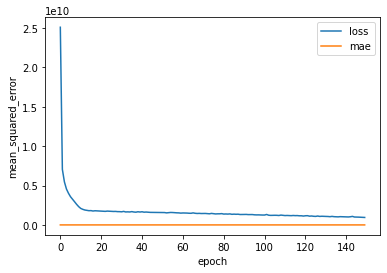

In [27]:
pd.DataFrame(history.history).plot()
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')

In [28]:
scores = model.evaluate(X_val, y_val, verbose=1)
preds = model.predict(test_edited)
preds

46/46 [==============================] - 0s 1ms/step


array([[141724.98],
 [187510.89],
 [192094.77],
 ...,
 [173544.88],
 [ 97086.39],
 [242259.47]], dtype=float32)

In [29]:
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds)
})
output

,Id,SalePrice
0,1461,141724.984375
1,1462,187510.890625
2,1463,192094.765625
3,1464,190856.234375
4,1465,186086.546875
...,...,...
1454,2915,81504.101562
1455,2916,99128.218750
1456,2917,173544.875000
1457,2918,97086.390625
